<div style = "font-family:Georgia;
              font-size:2.5vw;
              color:lightblue;
              font-style:bold;
              text-align:center;
              background:url('./Animations/Title Background.gif') no-repeat center;
              background-size:cover)">
   
     Histograms of Oriented Gradients (HOG)
          
</div>

<h1 style = "text-align:left">Introduction</h1>

As we saw with the ORB algorithm, we can use keypoints in images to do keypoint-based matching to detect objects in images. <br>
**Limitation**: These type of algorithms work great when you want to detect objects that have a **lot of consistent internal features** that are **not affected by the background**.<br>
For example, these algorithms work well for facial detection because faces have a lot of consistent internal features that don’t get affected by the image background, such as the eyes, nose, and mouth. <br>
However, these type of algorithms don’t work so well when attempting to do **more general object recognition**, say for example, **pedestrian detection** in images. <br>
The reason is that people **don’t have consistent internal features**, like faces do, because the **body shape and style of every person is different** (see Fig. 1). This means that every person is going to have a different set of internal features, and so we need something that can **more generally describe a person**. <br>
Interesting fact, that people and body parts detection is whe way more complicated problem in a sense, that it requires more generalized approach. Our body has different shape depends on person and does not have consistent features and it's sometimes **barely distinguishable from background**. 

<br>
<figure>
  <img src = "./Animations/pedestrians.jpeg" width = "100%" style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 1. - Pedestrians.</figcaption>
</figure> 
<br>

**Contours detection**

One option is to try to **detect pedestrians by their contours instead**.  Detecting objects in images by their **contours (boundaries)** is very challenging because we have to deal with the difficulties brought about by the **contrast between the background and the foreground** (or, in other words, how rapid are intensity changes of object and background). <br>
For example, suppose you wanted to detect a pedestrian in an image that is walking in front of a **white building** and she is wearing a **white coat and black pants** (see Fig. 2). We can see in Fig. 2, that since the background of the image is **mostly white**, the **black pants are going to have a very high contrast**, but the coat, since it is white as well, is going to have **very low contrast**. <br>
So, there is very **low contrast of white coat** on white background and **high contrast of black pants**. 

!!! In this case, **detecting the edges of pants is going to be easy** but **detecting the edges of the coat is going to be very difficult**. <br>
This is where **HOG** comes in. HOG stands for **Histograms of Oriented Gradients** and it was first introduced by Navneet Dalal and Bill Triggs in 2005.

<br>
<figure>
  <img src = "./Animations/woman.jpg" width = "100%" style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 2. - High and Low Contrast.</figcaption>
</figure> 
<br>

**How HOG works** 

The HOG algorithm works by **creating histograms of the distribution of gradient orientations** in an image and then **normalizing** them in a very special way. <br>
This **special normalization** is what makes HOG so effective at **detecting the edges of objects even in cases where the contrast is very low**. These normalized **histograms are put together** into a **feature vector**, known as the **HOG descriptor**, that can be used to train a **machine learning algorithm, such as a Support Vector Machine (SVM)**, to detect objects in images based on their boundaries (edges). <br>
Due to its great success and reliability, HOG has become one of the **most widely used algorithms in computer vison for object detection.***


In this notebook, you will learn:

* How the HOG algorithm works;
* How to use OpenCV to create a HOG descriptor;
* How to visualize the HOG descriptor. 

# The HOG Algorithm

As its name suggests, the HOG algorithm, is based on creating histograms from the orientation of image gradients. The HOG algorithm is implemented in a series of steps:

1. Given the image of particular object, set a **detection window (region of interest)** that covers the **entire object** in the image (see Fig. 3).

2. Calculate the **a) magnitude** and **b) direction** of the gradient for **each individual pixel** in the detection window.

3. Divide the detection window into connected *cells* of pixels, with all cells being of the same size (see Fig. 3) - so, basically **create cells grid**. The size of the cells is a **free parameter (hyperparameter)** and it is usually chosen so as to **match the scale of the features** that want to be detected. <br>
For example, in a 64 x 128 pixel detection window, square cells 6 to 8 pixels wide are suitable for detecting human limbs.

4. Create a **Histogram for each cell**, by :

  a) First **grouping the gradient directions** of all pixels in each cell into a **particular number of orientation      (angular) bins**; <br>
  b) And then **adding up the gradient magnitudes** of the gradients in **each angular bin** (see Fig. 3). <br>
     Note, the **number of bins** in the histogram is a **free parameter** and it is usually set to 9 angular bins.


5. Group adjacent cells into **blocks** (see Fig. 3). <br>
The **number of cells in each block is a free parameter*** and **all blocks must be of the same size**. <br>
The **distance between each block** (known as the **stride**) is a free parameter but it is usually set to **half the block size** (half of cells number in block), in which case you will get **overlapping blocks** (*see video below*).  The **HOG algorithm** has been shown empirically to **work better with overlapping blocks**.

6. Use the cells contained within each block to **normalize the cell histograms in that block** (see Fig. 3). If you have overlapping blocks this means that most cells will be normalized with respect to different blocks (*see video below*). Therefore, the same cell may have several different normalizations.

7. Collect all the **normalized histograms** from all the blocks into a **single feature vector called the HOG descriptor**.

8. Use the resulting HOG descriptors from **many images of the same type of object** to **train a machine learning algorithm**, such as an SVM, to detect those type of objects in images. <br>
For example, you could use the HOG descriptors from many images of pedestrians to **train an SVM to detect pedestrians in images**. The training is done with both positive a negative examples of the object you want detect in the image.

9. Once the SVM has been trained, a sliding window approach is used to try to detect and locate objects in images.  Detecting an object in the image entails finding the part of the image that looks similar to the HOG pattern learned by the SVM.

<br>
<figure>
  <img src = "./Animations/HOG Diagram2.png" width = "100%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 3. - HOG Diagram.</figcaption>
</figure> 
<br>

<figure>
<video src = "./Animations/HOG Animation - Medium.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">Vid. 1. - HOG Animation.</figcaption>
</figure> 

# Why The HOG Algorithm Works

As we learned above, HOG creates histograms by adding the magnitude of the gradients in particular orientations (angle corresponding to the bin in the histogram) in **localized portions** of the image called *cells*.  <br>
By doing this we guarantee that **stronger gradients will contribute more to the magnitude of their respective angular bin** (because we form histogram bins according to direction of gradient), while the effects of weak and randomly oriented gradients resulting from noise are minimized.<br>
In this manner the histograms tell us the **dominant gradient orientation** of each cell. 


### Dealing with contrast 

Now, the **magnitude of the dominant orientation can vary widely** due to variations in local illumination and the contrast between the background and the foreground.

To account for the background-foreground contrast differences, the HOG algorithm **tries to detect edges locally**.  In order to do this, it defines groups of cells, called **blocks**, and normalizes the histograms using this local group of cells. By normalizing locally, the HOG algorithm can detect the edges in each block very reliably; this is called **block normalization**.

In addition to using block normalization, the HOG algorithm also uses **overlapping blocks to increase its performance**.<br>
By using overlapping blocks, **each cell contributes several independent components to the final HOG descriptor**, where each component corresponds to a cell being normalized with respect to a different block. This may seem redundant but, it has been shown empirically that by normalizing each cell several times with respect to different local blocks, the performance of the HOG algorithm increases dramatically. 

## Libraries loading

Let's apply **HOG algorithm** on *triangle image*. <br>
We first start wilth **libraries and image loading**.<br>
We will convert **BGR image to RGB** and then, convert to **grayscale for analysis**. 

Shape of original image (250, 250, 3)
Shape of grayscale image (250, 250)


Text(0.5, 1.0, 'Grayscale image')

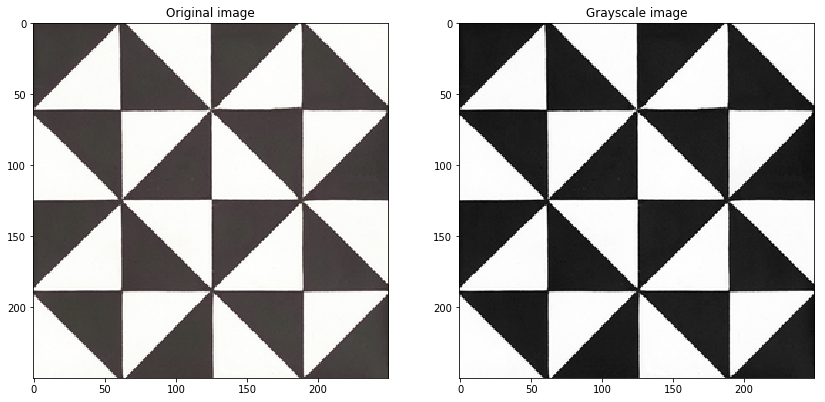

In [2]:
"""
 - start with displaying images - original and grayscale side-by-side 

"""
import numpy as np
import cv2
import matplotlib.pyplot as plt 

%matplotlib inline 
# set size of the figure 
plt.rcParams['figure.figsize'] = [14.0, 7.0]

image = cv2.imread('images/triangle_tile.jpeg')
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

print('Shape of original image', original_image.shape)
print('Shape of grayscale image', gray_image.shape)

plt.subplot(121)
plt.imshow(original_image)
plt.title('Original image')

plt.subplot(122)
plt.imshow(gray_image, cmap = 'gray')
plt.title('Grayscale image')

## Creating HOG descriptor

We are going to use `HOGDescriptor` class to create **HOG descriptor**. <br>
Parameters are set by `cv2.HOGDescriptor()` function. **Description of each parameter** is provided below: 

- **win_size** - *size*
Size of **detection window in pixels**. Defines the region of interest, must be an integer, multiple of cell size.

- **block_size** - *size*
**Block size in pixels** (width, height). Defines **how many cells are in each block**. <br>
Must be an integer multiple of cell size and **it must be smaller than the detection window**.
The **smaller the block the finer detail you will get**.

- **block_stride** – *size*
Block stride in **pixels (horizontal, vertical)**. <br>
It must be an **integer multiple of cell size**. The block_stride defines the **distance between adjecent blocks**, for example, 8 pixels horizontally and 8 pixels vertically. Longer block_strides makes the algorithm **run faster**(because less blocks are evaluated) but the **algorithm may not perform as well**.
Typical choice is **1/2 of block size**.


* **cell_size** – *Size*  
Cell size in pixels (*width, height*). Determines the **size fo your cell**. The **smaller the cell the finer detail you will get**.


* **nbins** – *int*  
Number of **bins for the histograms**. <br>
Determines the **number of angular bins used to make the histograms**. <br>
**Important**: With more bins you capture more gradient directions. HOG uses **unsigned gradients**, so the angular bins will have values between **0 and 180 degrees** (orientation or direction of gradient).


* **win_sigma** – *double*  
**Gaussian smoothing** window parameter. The performance of the HOG algorithm can be **improved by smoothing the pixels near the edges of the blocks** by applying a **Gaussian spatial window** to each pixel before computing the histograms.
Default value is set vy `DEFAULT_WIN_SIGMA`. 

* **threshold_L2hys** – *double*  
**L2-Hys** (Lowe-style clipped L2 norm) normalization method **shrinkage**. The L2-Hys method is used to normalize the blocks and it consists of an L2-norm followed by **clipping and a renormalization**.<br>
**L2-norm** calculates the distance from origin (0,0) to coordinate using Euclidean distance.<br>
The L2 norm is calculated as the **square root of the sum of the squared vector values**.
Example: <br>

  `from numpy import array
   from numpy.linalg import norm
   a = array([1, 2, 3])
   print(a)
   l2 = norm(a)
   print(l2)`<br>

   Output: `3.74165738677`


   The clipping **limits the maximum value of the descriptor vector for each block** to have the value of the given      threshold (0.2 by default).<br>
   After the clipping the descriptor vector is **renormalized** as described in *IJCV*, 60(2):91-110, 2004.
   https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf

* **gamma_correction** – *bool*  
Flag to specify whether the gamma correction preprocessing is required or not. Performing gamma correction **slightly increases the performance of the HOG algorithm**.


* **nlevels** – *int*  
Maximum number of detection window increases. Usually defined by default value `DEFAULT_NLEVELS`

**Default params** of HOG algoritm ar provided below: 

`cv2.HOGDescriptor(win_size = (64, 128),  
                  block_size = (16, 16),  
                  block_stride = (8, 8),  
                  cell_size = (8, 8),  
                  nbins = 9,  
                  win_sigma = DEFAULT_WIN_SIGMA,  
                  threshold_L2hys = 0.2,  
                  gamma_correction = true,  
                  nlevels = DEFAULT_NLEVELS)`


In gereral we will be interested in changing **first four parameters**: `block_size`, `block_stride`, `cell_size` and `nbins`.<br>
While the **rest of parameters** can be safely left at **default values**. 


Then, for a given `image` we will use `.compute()` function to compute HOG descriptor. 

In [3]:
# start with specifying parameters for HOG descriptor 

# choose cell size in pixels
# IMPORTANT: note, that cell size should be chosen in a way 
# that resulting Block Size is smaller than the Detection Window 

cell_size = (6,6)

# then choose number of cells in block in both x and y directions 
# IMPORTANT: note, that cell size should be chosen in a way 
# that resulting Block Size is smaller than the Detection Window 
num_cells_per_block = (2,2) # one block = 2x2 cells

# Block Size in pixels (width, height)
# Block Size must be smaller than Detection Window 

block_size = (cell_size[0] * num_cells_per_block[0],
              cell_size[1] * num_cells_per_block[1])

# next, calculate the number of cells that can be fit in our grayscale image in both x and y directions
x_cells = gray_image.shape[0] // cell_size[0]
y_cells = gray_image.shape[1] // cell_size[1]

# select Horizontal stride - distance between the blocks in units of Cell size. 
# must be (x_cells - num_cells_per_block.shape[0]) / h_stride = integer
# so, we need to leave a space at least for cells in one block

h_stride = 1 # stride of one cell size or 1/2 of block's width 

# select Vertical stride - distance between the blocks in units of Cell size. 
# must be (y_cells - num_cells_per_block.shape[1]) / v_stride = integer
# so, we need to leave a space at least for cells in one block

v_stride = 1 # stride of one cell size or 1/2 of block's height 

# therefore, our block stride in pixels will be following (width, height)

block_stride = (cell_size[0] * h_stride, cell_size[1] * h_stride)

# number of gradient orientation bins
num_bins = 9

# now, specify detection window in pixels (width, height)
# Detection Window sholud be slightly smaller than image itself 
win_size = (x_cells * cell_size[0], y_cells * cell_size[1])

# now, print the shape of grayscale image for reference 
print('The shape of grayscale image: ', gray_image.shape)
print()

# then, print parameters of HOG descriptor 
print('HOG Descriptor parameters:\n')
print('Window Size:', win_size)
print('Cell size:', cell_size)
print('Block Size:', block_size)
print('Block Stride:', block_stride)
print('Number of Bins:', num_bins)
print()

# set HOG descriptor params, using values above

hog = cv2.HOGDescriptor(win_size, 
                        block_size,
                        block_stride,
                        cell_size,
                        num_bins)
# compute descriptor for grayscale image 
hog_descriptor = hog.compute(gray_image)

The shape of grayscale image:  (250, 250)

HOG Descriptor parameters:

Window Size: (246, 246)
Cell size: (6, 6)
Block Size: (12, 12)
Block Stride: (6, 6)
Number of Bins: 9



# Number of Elements In The HOG Descriptor

The resulting HOG Descriptor (feature vector), contains the normalized histograms from all cells from all blocks in the detection window concatenated in one long vector. Therefore, the size of the HOG feature vector will be given by the total number of blocks in the detection window, multiplied by the number of cells per block, times the number of orientation bins:

<span class="mathquill">
\begin{equation}
\mbox{total_elements} = (\mbox{total_number_of_blocks})\mbox{ } \times \mbox{ } (\mbox{number_cells_per_block})\mbox{ } \times \mbox{ } (\mbox{number_of_bins})
\end{equation}
</span>

If we don’t have overlapping blocks (*i.e.* the `block_stride`equals the `block_size`), the total number of blocks can be easily calculated by dividing the size of the detection window by the block size. However, in the general case we have to take into account the fact that we have overlapping blocks. To find the total number of blocks in the general case (*i.e.* for any `block_stride` and `block_size`), we can use the formula given below:

<span class="mathquill">
\begin{equation}
\mbox{Total}_i = \left( \frac{\mbox{block_size}_i}{\mbox{block_stride}_i} \right)\left( \frac{\mbox{window_size}_i}{\mbox{block_size}_i} \right) - \left [\left( \frac{\mbox{block_size}_i}{\mbox{block_stride}_i} \right) - 1 \right]; \mbox{  for  } i = x,y
\end{equation}
</span>

Where <span class="mathquill">Total$_x$</span>, is the total number of blocks along the width of the detection window, and <span class="mathquill">Total$_y$</span>, is the total number of blocks along the height of the detection window. This formula for <span class="mathquill">Total$_x$</span> and <span class="mathquill">Total$_y$</span>, takes into account the extra blocks that result from overlapping. After calculating <span class="mathquill">Total$_x$</span> and <span class="mathquill">Total$_y$</span>, we can get the total number of blocks in the detection window by multiplying <span class="mathquill">Total$_x$  $\times$ Total$_y$</span>. The above formula can be simplified considerably because the `block_size`, `block_stride`, and `window_size`are all defined in terms of the `cell_size`. By making all the appropriate substitutions and cancelations the above formula reduces to:

<span class="mathquill">
\begin{equation}
\mbox{Total}_i = \left(\frac{\mbox{cells}_i - \mbox{num_cells_per_block}_i}{N_i}\right) + 1\mbox{  }; \mbox{  for  } i = x,y
\end{equation}
</span>

Where <span class="mathquill">cells$_x$</span> is the total number of cells along the width of the detection window, and <span class="mathquill">cells$_y$</span>, is the total number of cells along the height of the detection window. And <span class="mathquill">$N_x$</span> is the horizontal block stride in units of `cell_size` and <span class="mathquill">$N_y$</span> is the vertical block stride in units of `cell_size`. 

Let's calculate what the number of elements for the HOG feature vector should be and check that it matches the shape of the HOG Descriptor calculated above.

In [4]:
# start with calculating number of blocks along the width of detection window 
# note, that we convert result to integer of 32 bit (that cn be represented by 2ˆ32 number)

tot_bx =np.uint32(((x_cells - num_cells_per_block[0]) / h_stride) + 1)
tot_by =np.uint32(((y_cells - num_cells_per_block[1]) / v_stride) + 1)

# next, calculate the total number of elements in HOG feature vector
tot_els = tot_bx * tot_by * num_cells_per_block[0] * num_cells_per_block[1] * num_bins
# represent the result and calculation steps

print('\nTotal number of elements in HOG descriptor is: ',
     tot_bx, 'x',
     tot_by, 'x',
     num_cells_per_block[0], 'x',
     num_cells_per_block[1], 'x',
     num_bins, '=',
     tot_els)
print('Shape of HOG Descriptor is:', hog_descriptor.shape)


Total number of elements in HOG descriptor is:  40 x 40 x 2 x 2 x 9 = 57600
Shape of HOG Descriptor is: (57600, 1)


Basically, we can say, that assuming **9 bins histogram in each cell**, there are **57600 elements (bins)** in HOG descriptor. So, **each histogram associated with each cell**.

# Visualizing The HOG Descriptor

We can visualize the HOG Descriptor by **plotting the histogram associated with each cell** as a collection of vectors. <br>

**Important**: what does historgram represent?

To do this, we will plot **each bin in the histogram as a single vector** whose **magnitude is given by the height of the bin** and its **orientation is given by the angular bin that its associated with**. <br>
Since any given cell might have **multiple histograms associated with it**, due to the **overlapping** blocks, we will choose to average all the histograms for each cell to produce a **single histogram for each cell**.

**OpenCV** has **no easy way to visualize the HOG Descriptor**, so we have to do some manipulation first in order to visualize it. 

**Steps for visualisation**

1) We will start by **reshaping the HOG Descriptor** in order to make our calculations easier; <br>
2) We will then **compute the average histogram of each cell**; 
3) Finally we will **convert the histogram bins into vectors**.

Once we have the vectors, we plot the corresponding **vectors for each cell in an image**. 

The code below produces an interactive plot so that you can interact with the figure. The figure contains:

* the grayscale image, 
* the HOG Descriptor (feature vector), 
* a zoomed-in portion of the HOG Descriptor, and 
* the histogram of the selected cell. 

**You can click anywhere on the gray scale image or the HOG Descriptor image to select a particular cell**. <br>
Once you click on either image a *magenta* rectangle will appear showing the cell you selected. The Zoom Window will show you a zoomed in version of the HOG descriptor around the selected cell; and the histogram plot will show you the **corresponding histogram for the selected cell**.<br>
The interactive window also has buttons at the bottom that allow for other functionality, such as panning, and giving you the option to save the figure if desired. The home button returns the figure to its default value.

**NOTE**: If you are running this notebook in the Udacity workspace, there is around a 2 second lag in the interactive plot. This means that if you click in the image to zoom in, it will take about 2 seconds for the plot to refresh. 

Shape of HOG descriptor: (57600, 1)
Shape of reshaped HOG descriptor: (40, 40, 2, 2, 9)
Shape of average gradient array (41, 41, 9)


<IPython.core.display.Javascript object>


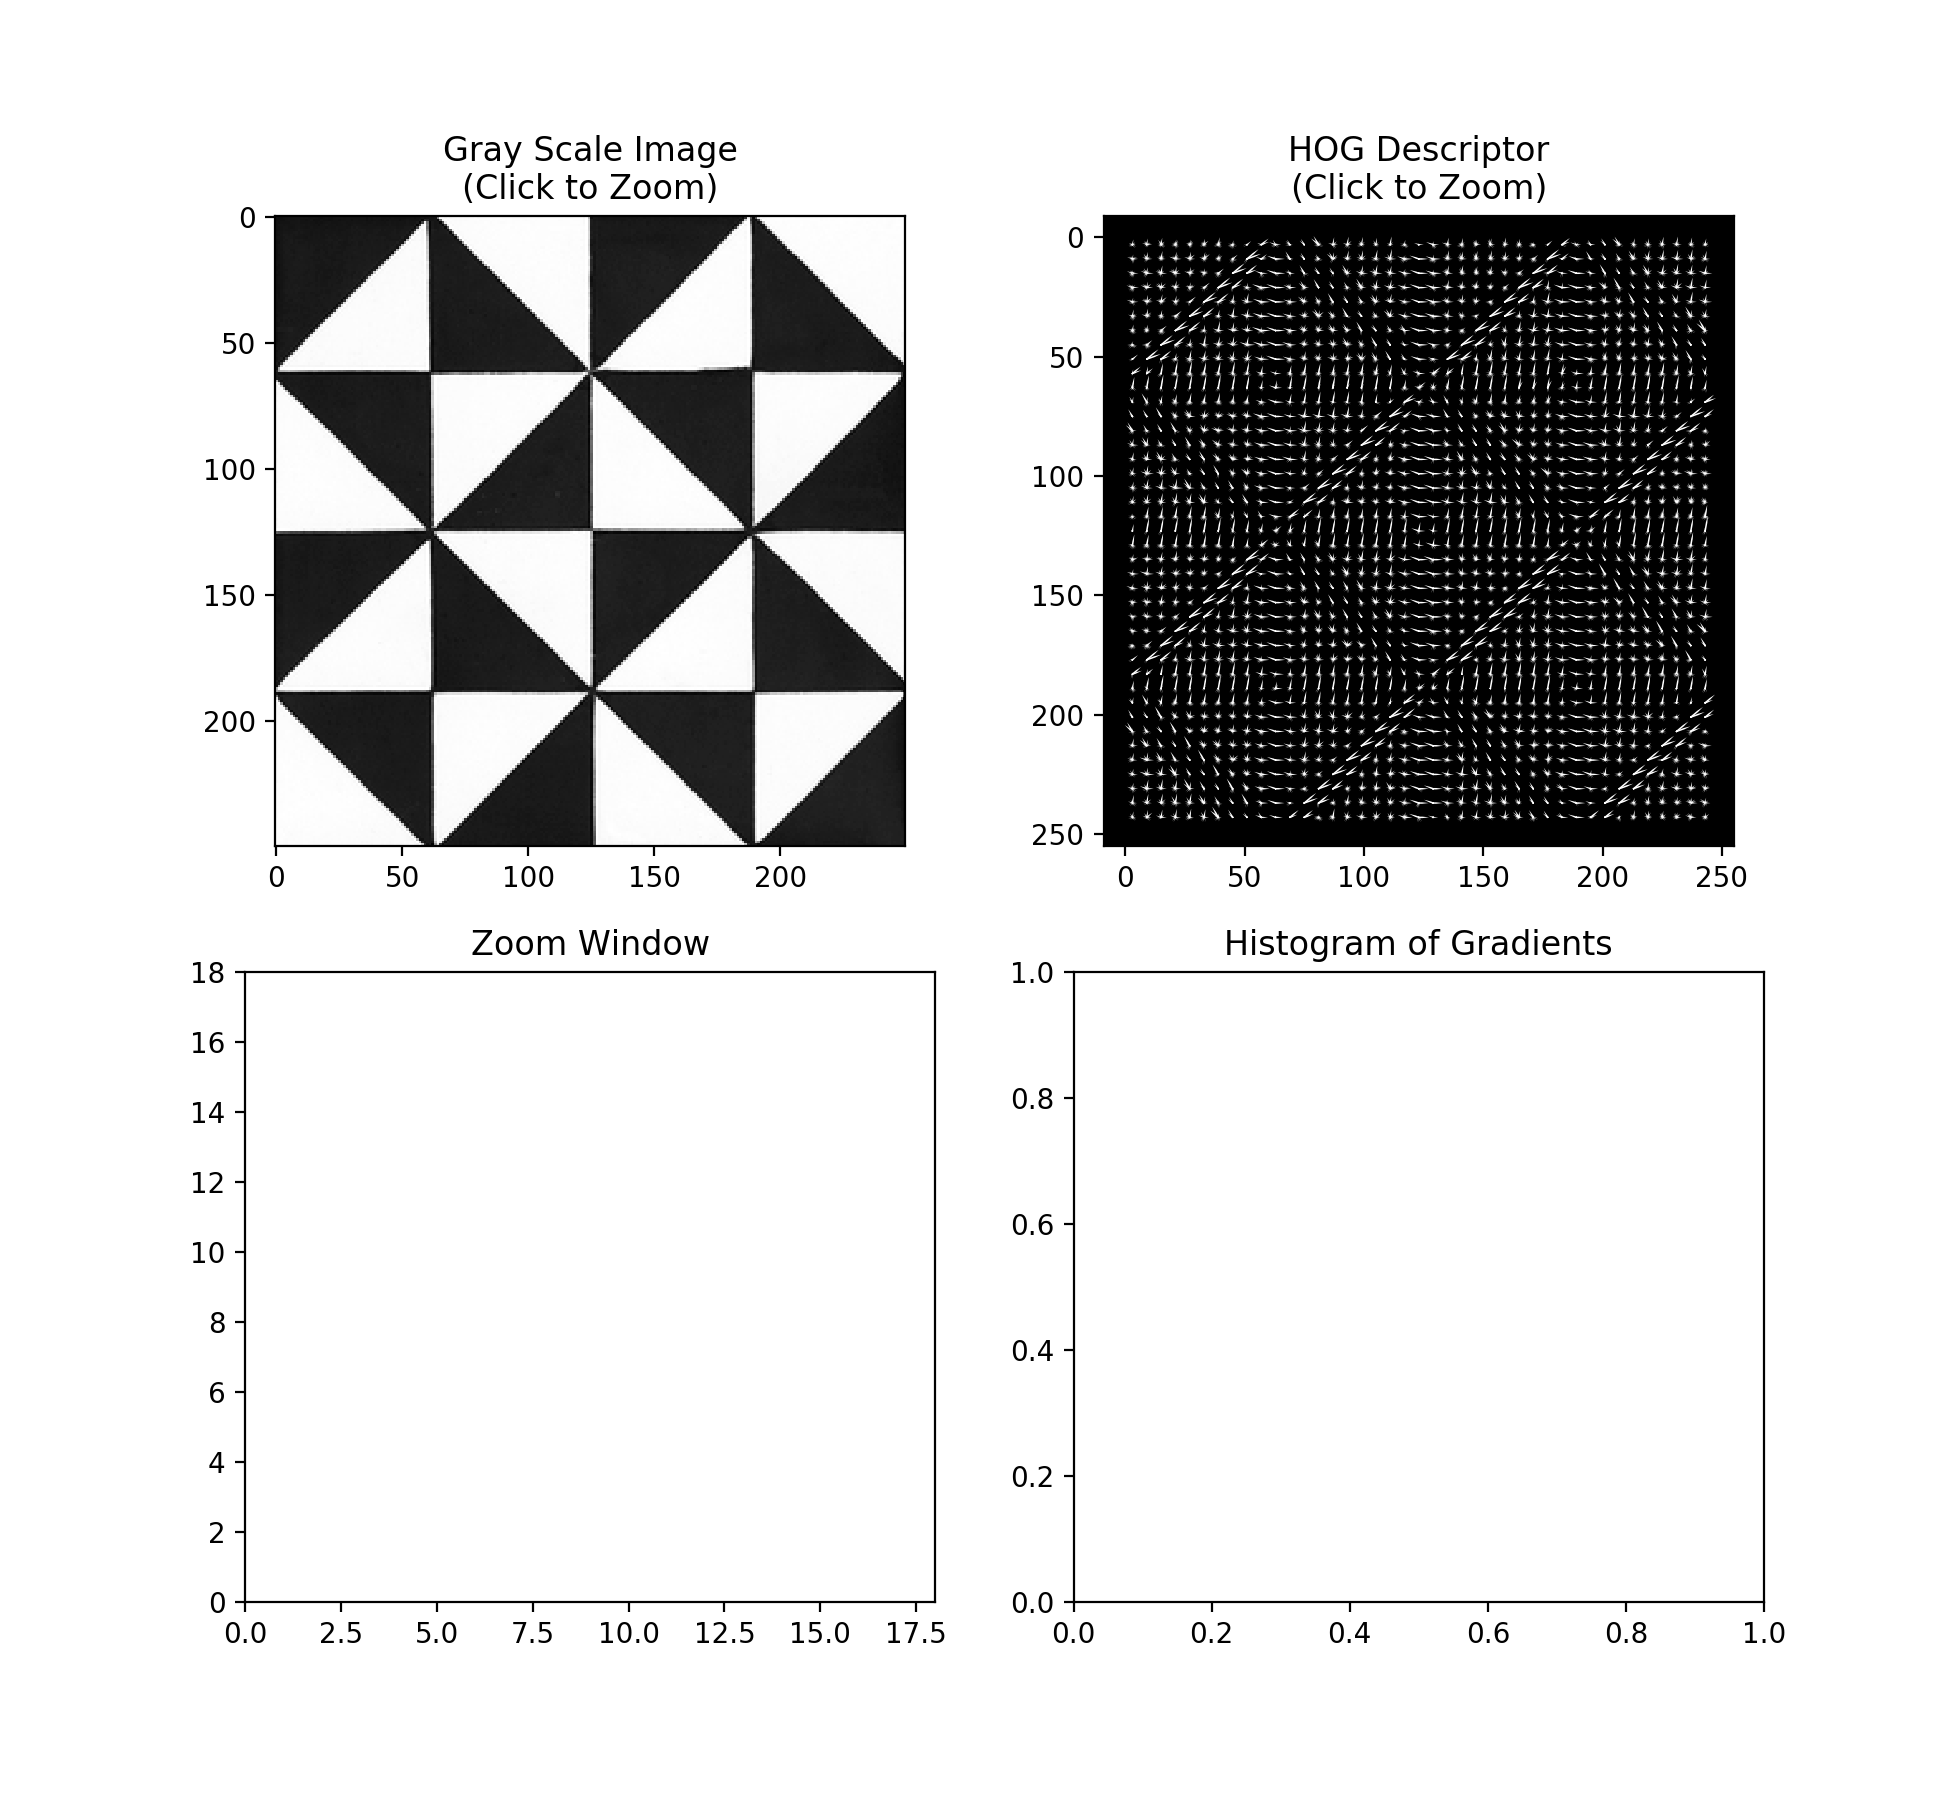

In [47]:
# import additional packeges and set up params 

%matplotlib notebook 
import copy 
from matplotlib import patches 

plt.rcParams['figure.figsize'] = [9.8, 9.0]

# Reshape the feature vector to [blocks_y, blocks_x, num_cells_per_block_x, num_cells_per_block_y, num_bins].
# The blocks_x and blocks_y will be transposed so that the first index (blocks_y) referes to the row number
# and the second index (block_x) to the column number. 
# This will be useful later when we plot the feature vector, so 
# that the feature vector indexing matches the image indexing.

# note, we use transpose to replace blocks_x by blocks_y
hog_descriptor_reshaped = hog_descriptor.reshape(tot_bx,
                                        tot_by,
                                        num_cells_per_block[0],
                                        num_cells_per_block[1],
                                        num_bins 
                                       ).transpose((1,0,2,3,4))

# next, print shape of original HOG descriptor and reshaped one for reference

print('Shape of HOG descriptor:', hog_descriptor.shape)
print('Shape of reshaped HOG descriptor:', hog_descriptor_reshaped.shape)

# next, let's create an arrya, that will hold average gradients per each cell 
# so, it will be cell position and average gradients per each bin 
ave_grad = np.zeros((y_cells, x_cells, num_bins))

# print the average gradients array shape
print('Shape of average gradient array', ave_grad.shape)

# create an array, that will count histograms per cell 
# since we have overlapping blocks, each (x,y) cell represents number of histograms per cell 
hist_counter = np.ones((y_cells, x_cells, 1))

# Add up all the histograms for each cell and count the number of histograms per cell
for i in range(num_cells_per_block[0]):
    for j in range(num_cells_per_block[1]):
        # sum up the histograms for each cell in x and y directions
        # since each cell has at least one histogram (assuming overlapping blocks)
        # we add histogram's bins from reshaped HOG descriptor 
        ave_grad[i:tot_bx+i,
                 j:tot_by+j] += hog_descriptor_reshaped[:,:,i,j,:]
        # create histograms counter 
        hist_counter[i:tot_bx + i,
                    j:tot_bx + j]+=1
        
# IMPORTANT: each (x,y) cell in ave_grad array has histogram of 9 bins 
# next we will average bin (which is sum of gradients) per each cell:
# we will divide each of 9 bins in cell on number of histograms 
ave_grad /=hist_counter

# then, calculate total number of vectors, that we have in all cells
len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

# Create an array that has num_bins equally spaced between 0 and 180 degress in radians.
# use np.linspace() function for this
deg = np.linspace(0, np.pi, num_bins, endpoint = False)

# Each cell will have a histogram with num_bins. For each cell, plot each bin as a vector (with its magnitude
# equal to the height of the bin in the histogram, and its angle corresponding to the bin in the histogram). 
# To do this, create rank 1 arrays that will hold the (x,y)-coordinate of all the vectors in all the cells in the
# image. Also, create the rank 1 arrays that will hold all the (U,V)-components of all the vectors in all the
# cells in the image. Create the arrays that will hold all the vector positons and components.
U = np.zeros((len_vecs))
V = np.zeros((len_vecs))
X = np.zeros((len_vecs))
Y = np.zeros((len_vecs))

# Set the counter to zero
counter = 0

# Use the cosine and sine functions to calculate the vector components (U,V) from their maginitudes. Remember the 
# cosine and sine functions take angles in radians. Calculate the vector positions and magnitudes from the
# average gradient array
for i in range(ave_grad.shape[0]):
    for j in range(ave_grad.shape[1]):
        for k in range(ave_grad.shape[2]):
            U[counter] = ave_grad[i,j,k] * np.cos(deg[k])
            V[counter] = ave_grad[i,j,k] * np.sin(deg[k])
        
            X[counter] = (cell_size[0] / 2) + (cell_size[0] * i)
            Y[counter] = (cell_size[1] / 2) + (cell_size[1] * j)
        
            counter = counter + 1

# Create the bins in degress to plot our histogram. 
angle_axis = np.linspace(0, 180, num_bins, endpoint = False)
angle_axis += ((angle_axis[1] - angle_axis[0]) / 2)

# Create a figure with 4 subplots arranged in 2 x 2
fig, ((a,b),(c,d)) = plt.subplots(2,2)

# Set the title of each subplot
a.set(title = 'Gray Scale Image\n(Click to Zoom)')
b.set(title = 'HOG Descriptor\n(Click to Zoom)')
c.set(title = 'Zoom Window', xlim = (0, 18), ylim = (0, 18), autoscale_on = False)
d.set(title = 'Histogram of Gradients')

# Plot the gray scale image
a.imshow(gray_image, cmap = 'gray')
a.set_aspect(aspect = 1)

# Plot the feature vector (HOG Descriptor)
b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
b.invert_yaxis()
b.set_aspect(aspect = 1)
b.set_facecolor('black')

# Define function for interactive zoom
def onpress(event):
    
    #Unless the left mouse button is pressed do nothing
    if event.button != 1:
        return
    
    # Only accept clicks for subplots a and b
    if event.inaxes in [a, b]:
        
        # Get mouse click coordinates
        x, y = event.xdata, event.ydata
        
        # Select the cell closest to the mouse click coordinates
        cell_num_x = np.uint32(x / cell_size[0])
        cell_num_y = np.uint32(y / cell_size[1])
        
        # Set the edge coordinates of the rectangle patch
        edgex = x - (x % cell_size[0])
        edgey = y - (y % cell_size[1])
        
        # Create a rectangle patch that matches the the cell selected above        
        rect = patches.Rectangle((edgex, edgey),
                                  cell_size[0], cell_size[1],
                                  linewidth = 1,
                                  edgecolor = 'magenta',
                                  facecolor='none')
        
        # A single patch can only be used in a single plot. Create copies
        # of the patch to use in the other subplots
        rect2 = copy.copy(rect)
        rect3 = copy.copy(rect)
        
        # Update all subplots
        a.clear()
        a.set(title = 'Gray Scale Image\n(Click to Zoom)')
        a.imshow(gray_image, cmap = 'gray')
        a.set_aspect(aspect = 1)
        a.add_patch(rect)

        b.clear()
        b.set(title = 'HOG Descriptor\n(Click to Zoom)')
        b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
        b.invert_yaxis()
        b.set_aspect(aspect = 1)
        b.set_facecolor('black')
        b.add_patch(rect2)

        c.clear()
        c.set(title = 'Zoom Window')
        c.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 1)
        c.set_xlim(edgex - cell_size[0], edgex + (2 * cell_size[0]))
        c.set_ylim(edgey - cell_size[1], edgey + (2 * cell_size[1]))
        c.invert_yaxis()
        c.set_aspect(aspect = 1)
        c.set_facecolor('black')
        c.add_patch(rect3)

        d.clear()
        d.set(title = 'Histogram of Gradients')
        d.grid()
        d.set_xlim(0, 180)
        d.set_xticks(angle_axis)
        d.set_xlabel('Angle')
        d.bar(angle_axis,
              ave_grad[cell_num_y, cell_num_x, :],
              180 // num_bins,
              align = 'center',
              alpha = 0.5,
              linewidth = 1.2,
              edgecolor = 'k')

        fig.canvas.draw()

# Create a connection between the figure and the mouse click
fig.canvas.mpl_connect('button_press_event', onpress)
plt.show()

# Understanding The Histograms

Let's take a look at a couple of snapshots of the above figure to see if the histograms for the selected cell make sense. Let's start looking at a cell that is inside a triangle and not near an edge:

<br>
<figure>
  <img src = "./Animations/snapshot1.png" width = "70%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:center; font-style:italic">Fig. 4. - Histograms Inside a Triangle.</figcaption>
</figure> 
<br>

In this case, since the triangle is **nearly all of the same color there shouldn't be any dominant gradient in the selected cell**.<br>
As we can clearly see in the Zoom Window and the histogram, **this is indeed the case**. <br>
We have many gradients but **none of them clearly dominates over the other** (since the color is the same).

Now let’s take a look at a cell that is near a horizontal edge:

<br>
<figure>
  <img src = "./Animations/snapshot2.png" width = "70%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:center; font-style:italic">Fig. 5. - Histograms Near a Horizontal Edge.</figcaption>
</figure> 
<br>

Remember that edges are areas of an image where the **intensity changes abruptly**.<br>
In these cases, we will have a **high intensity gradient in some particular direction**.<br>
This is exactly what we see in the corresponding histogram and Zoom Window for the selected cell.  In the Zoom Window, we can see that the **dominant gradient is pointing up** (arrow up), almost at 90 degrees, since that’s the direction in which there is a **sharp change in intensity** (horizonral change almost 90 degrees).<br>
If we would plot **Fourier transformation**, it would show us **vertical line of bright points, that **epmhasize the horizontal change in intensity**.  
Therefore, we should expect to see the **90-degree bin in the histogram to dominate strongly** over the others. This is in fact what we see. (Angle 90 degrees).

Now let’s take a look at a cell that is near a vertical edge:

<br>
<figure>
  <img src = "./Animations/snapshot3.png" width = "70%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:center; font-style:italic">Fig. 6. - Histograms Near a Vertical Edge.</figcaption>
</figure> 
<br>

In this case we expect the **dominant gradient** in the cell to be **horizontal, close to 180 degrees**, since that’s the direction in which there is a sharp change in intensity.<br>
Therefore, we should expect to see the **170-degree bin in the histogram to dominate strongly over the others**.<br>
Here see that there are 2 gradient **laying almost horizontally in 10 and 170 degrees**. 

This is what we see in the histogram but we also see that there is **another dominant gradient in the cell**, namely the one in the 10-degree bin. <br>
**IMPORTANT: unsigned gradients in HOG algorithm**


The reason for this, is because the HOG algorithm is using **unsigned gradients**, which means **0 degrees and 180 degrees are considered the same**. <br>
Therefore, when the histograms are being created, **angles between 160 and 180 degrees, contribute proportionally to both the 10-degree bin and the 170-degree bin**. This results in there being two dominant gradients in the cell near the vertical edge instead of just one. 

To conclude let’s take a look at a cell that is near a diagonal edge.

<br>
<figure>
  <img src = "./Animations/snapshot4.png" width = "70%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:center; font-style:italic">Fig. 7. - Histograms Near a Diagonal Edge.</figcaption>
</figure> 
<br>

To understand what we are seeing, let’s first remember that gradients have an *x*-component, and a *y*-component, just like vectors. <br>

Therefore, the resulting orientation of a gradient is going to be given by the **vector sum of its components**.<br>

**Important**

When we are dealing with edges, we have **vertical and horizontal edges**.<br>
* **Vertical edges** have horizontal gradients and therefore, only **x-component**;
* **Horizontal edges** have vertical component and therefore, only **y-component**. 
* **Diagonal edges** have both non-zero-gradients and **x and y components** together. 


Analogy if Fourier transformation, where we have **lines of bright points along with gradients**. 

For this reason, on vertical edges the gradients are **horizontal, because they only have an x-component**, as we saw in Figure 4. <br>
While on horizontal edges the gradients are **vertical, because they only have a y-component**, as we saw in Figure 3. <br>
Consequently, on diagonal edges, the **gradients are also going to be diagonal because both the *x* and *y* components are non-zero**.  <br>
Since the diagonal edges in the image are close to 45 degrees, we should expect to see a dominant gradient orientation in the 50-degree bin. This is in fact what we see in the histogram but, just like in Figure 4., we see there are two dominant gradients instead of just one. <br>

The reason for this is that when the histograms are being created, **angles that are near the boundaries of bins**, contribute **proportionally to the adjacent (next) bins**.<br>

**Support example**
For example, a gradient with an angle of 40 degrees will be in the middle of bin from 30 to 50 degrees. <br>
Consequently the gradient magnitude (or stregth) is split **evenly (equally) into 30 degrees and 50 degrees**. <br>
As a result, we will have 2 dominant vectors - **30 and 50 degrees**. 

Now that you know how HOG is implemented, in the workspace you will find a notebook named *Examples*. In there, you will be able set your own paramters for the HOG descriptor for various images. Have fun!